In [1]:
import pandas as pd
import numpy as np
import json 
import re
import xml.etree.ElementTree as ET
import pickle
from pyhpo import Ontology
from fractions import Fraction
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
_ = Ontology()


# Step 1: Read survey data

In [2]:
df_read = pd.read_csv('data/Survey_Symptoms_US.tsv', sep='\t')

# Step 2: Clean and filter data
- Drop the unecessary columns: 'Unnamed: 0'
- Ignore cases has no one value
- Impose a minumum number of cases
- Create frequency table for diseases   

In [3]:
df = df_read.drop(['Unnamed: 0'], axis=1)
df = df.fillna(0)
rows_drop = df.loc[df.drop(['Disease_Name'], axis=1).sum(axis=1)==0].index
print('Number of the rows droped: ', len(rows_drop))
df.drop(df.loc[df.drop(['Disease_Name'], axis=1).sum(axis=1)==0].index, inplace=True)
col_drop = df.columns[df.sum()==0]
df.drop(columns=col_drop, inplace=True)
print('symptoms dropped which has no one value: ', list(col_drop))

Number of the rows droped:  288
symptoms dropped which has no one value:  ['Extramedullary_Hematopoiesis_Symptom_Present', 'Diabetes_Insipidus_Symptom_Present', 'Adrenal_Hyperplasia_Symptom_Present', 'Goiter_Symptom_Present', 'Hyperparathyroidism_Symptom_Present', 'Hypoparathyroidism_Symptom_Present', 'Pseudohypoparathyroidism_Symptom_Present', 'Arterial_Dissection_Symptom_Present', 'Hypoelastic_Skin_Symptom_Present', 'Colon_Cancer_Symptom_Present', 'Kidney_Cancer_Symptom_Present', 'Thyroid_Cancer_Symptom_Present', 'Non_Melanoma_Skin_Symptom_Present', 'Brain_Spine_Cancer_Symptom_Present', 'Breast_Cancer_Symptom_Present', 'Ovarian_Cancer_Symptom_Present', 'Uterine_Cancer_Symptom_Present', 'Cervical_Cancer_Symptom_Present', 'Prostate_Cancer_Symptom_Present', 'Lung_Cancer_Symptom_Present', 'Pancreatic_Cancer_Symptom_Present', 'Bladder_Cancer_Symptom_Present', 'Melanoma_Skin_Symptom_Present']


In [4]:
# normalize CSHQ scores by max  value
df['CSHQ Subscale 1: Bedtime Resistance']= (df['CSHQ Subscale 1: Bedtime Resistance'])/(18)
df['CSHQ Subscale 2: Sleep onset Delay']= (df['CSHQ Subscale 2: Sleep onset Delay'])/(3)
df['CSHQ Subscale 3: Sleep Duration']= (df['CSHQ Subscale 3: Sleep Duration'])/(9)
df['CSHQ Subscale 4: Sleep Anxiety']= (df['CSHQ Subscale 4: Sleep Anxiety'])/(12)
df['CSHQ Subscale 5: Night Wakings']= (df['CSHQ Subscale 5: Night Wakings'])/(9)
df['CSHQ Subscale 6: Parasomnias']= (df['CSHQ Subscale 6: Parasomnias'])/(21)
df['CSHQ Subscale 7: Sleep Disordered Breathing']= (df['CSHQ Subscale 7: Sleep Disordered Breathing'])/(9)
df['CSHQ Subscale 8: Daytime Sleepiness']= (df['CSHQ Subscale 8: Daytime Sleepiness'])/(24)

In [5]:
df.head(5)

,Asthma_Symptom_Present,COPD_Symptom_Present,Respitory_Abnormality_Symptom_Present,Decreased_Pulmonary_Function_Symptom_Present,Abnormal_Diaphragm_Symptom_Present,Respitory_Insufficiency_Symptom_Present,Restrictive_Lung_Disease_Symptom_Present,Abnormal_Breathing_Patterns_Symptom_Present,Abnormal_Upper_Respiratory_Symptom_Present,Abnormal_Eye_Movement_Symptom_Present,...,PELHS Wheelchair,CSHQ Subscale 1: Bedtime Resistance,CSHQ Subscale 2: Sleep onset Delay,CSHQ Subscale 3: Sleep Duration,CSHQ Subscale 4: Sleep Anxiety,CSHQ Subscale 5: Night Wakings,CSHQ Subscale 6: Parasomnias,CSHQ Subscale 7: Sleep Disordered Breathing,CSHQ Subscale 8: Daytime Sleepiness,Disease_Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Kleefstra syndrome
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Koolen-de Vries Syndrome
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.444444,0.333333,0.333333,0.416667,0.444444,0.380952,0.444444,0.416667,Koolen-de Vries Syndrome
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.333333,0.333333,0.416667,0.333333,0.333333,0.333333,0.375000,CHD2 related disorders
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.611111,0.333333,0.666667,0.666667,0.444444,0.523810,0.444444,0.333333,FOXP1 Syndrome


In [6]:
disease_cases_count = df.groupby('Disease_Name')['Disease_Name'].count()
#cases per disease
disease_cases_count

Disease_Name
4H Leukodystrophy                             8
8p-related disorders                         10
AHC (Alternating Hemiplegia of Childhood)    18
ARHGEF9-related disorders                     3
CACNA1A related disorders                    43
CASK-Related Disorders                       14
CHAMP1 related disorders                     13
CHD2 related disorders                       26
CHOPS Syndrome                                2
Classic homocystinuria                        5
DYRK1A Syndrome                              16
FAM177A1 Associated Disorder                  1
FOXP1 Syndrome                               29
HUWE1-related disorders                      18
KDM5C-related disorders                      10
Kleefstra syndrome                           24
Koolen-de Vries Syndrome                      7
MSL3 -related disorders                       7
Malan Syndrome                               29
NARS1 genetic mutation                        3
Ogden Syndrome (NAA10)     

Impose a minimum number of cases

In [7]:
def count_if_enough_cases(x, n=5):
    if x.count()>=n:
        return np.count_nonzero(x)
    else:
        return np.nan

In [8]:
freq_table = df.groupby('Disease_Name').agg(count_if_enough_cases)
dis_disclosed = list(freq_table.loc[freq_table.isna().all(axis=1)].index)
print('Diseases have less than 5 cases: \n', dis_disclosed)
freq_table = freq_table.loc[~freq_table.isna().all(axis=1)]

Diseases have less than 5 cases: 
 ['ARHGEF9-related disorders', 'CHOPS Syndrome', 'FAM177A1 Associated Disorder', 'NARS1 genetic mutation']


In [9]:
rx_diseases = list(freq_table.index)
total_rx_diseases = len(freq_table)
#diseases in the survey data after filter
rx_diseases

['4H Leukodystrophy',
 '8p-related disorders',
 'AHC (Alternating Hemiplegia of Childhood)',
 'CACNA1A related disorders',
 'CASK-Related Disorders',
 'CHAMP1 related disorders',
 'CHD2 related disorders',
 'Classic homocystinuria',
 'DYRK1A Syndrome',
 'FOXP1 Syndrome',
 'HUWE1-related disorders',
 'KDM5C-related disorders',
 'Kleefstra syndrome',
 'Koolen-de Vries Syndrome',
 'MSL3 -related disorders',
 'Malan Syndrome',
 'Ogden Syndrome (NAA10)',
 'Pallister-Killian mosaic syndrome (PKS)',
 'Ring14 and related disorders',
 'SETBP1-related disorder',
 'STXBP1 related Disorders',
 'SYNGAP1 related disorders',
 'Wiedemann-Steiner Syndrome (WSS)']

# Step 3: Generate computational data
- Compute the specification of terms for diseases with Term Frequency(TF) and Inverse Document Frequency(IDF) information
- Get the very specific symptoms for diseases 
- Map the symptom to hpo terms

### Get the high specific symptoms from survey dataset

In [10]:
rx_impotant = freq_table.melt(ignore_index=False, var_name='Symptom', value_name='Count')
rx_impotant = rx_impotant.loc[rx_impotant['Count']>0]
rx_impotant['not_count'] = rx_impotant.apply(lambda x: disease_cases_count[x.name]-x.Count, axis=1)
rx_impotant['term_proportion'] = rx_impotant.apply(lambda x: x.Count/disease_cases_count[x.name], axis=1)

In [11]:
def IDF_compute(x, total_diseases):
    disease_per_term = x
    #print(x)
    IC_val = (np.log(total_diseases / (disease_per_term + 1)) + 1)
    return IC_val

In [12]:
#compute term frequency for each term/symtoms with diseases
total_disease_terms = freq_table.sum(axis=1)
rx_impotant['survey_frequency'] = rx_impotant.apply(lambda x: x['Count']/total_disease_terms[x.name], axis=1)

In [13]:
#compute idf for each term/symtoms with diseases
hpo_freq = rx_impotant.groupby('Symptom')['Count'].count()
hpo_idf = hpo_freq.apply(IDF_compute, total_diseases = total_rx_diseases)
rx_impotant['survey_idf'] = rx_impotant['Symptom'].apply(lambda x: hpo_idf[x])

In [14]:
#compute tf/idf of the terms with diseases
rx_impotant['survey_tf_idf'] = rx_impotant['survey_idf'] * rx_impotant['survey_frequency']

In [15]:
rx_impotant.sort_values('survey_tf_idf', ascending=False).head(10)

,Symptom,Count,not_count,term_proportion,survey_frequency,survey_idf,survey_tf_idf
Disease_Name,,,,,,,
Classic homocystinuria,CSHQ Subscale 3: Sleep Duration,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 2: Sleep onset Delay,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 7: Sleep Disordered Breathing,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 6: Parasomnias,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 8: Daytime Sleepiness,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 1: Bedtime Resistance,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 4: Sleep Anxiety,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Classic homocystinuria,CSHQ Subscale 5: Night Wakings,4.0,1.0,0.800000,0.088889,0.957440,0.085106
Malan Syndrome,Tall_Stature_Symptom_Present,20.0,9.0,0.689655,0.027663,2.343735,0.064834


### Map the symptoms to HPO phenotypes 

In [16]:
df_hpo = pd.read_csv('data/symptoms_map.csv')
hpo_map_symptom = dict(zip(df_hpo['Symptom'], df_hpo['Curated HPO']))
#hpo_map_symptom

In [17]:
rx_impotant['HPO_Code'] = rx_impotant['Symptom'].apply(lambda x: hpo_map_symptom[x].strip())
rx_impotant[['Symptom', 'HPO_Code']].value_counts().head(10)
rx_impotant['HPO_label'] = rx_impotant['HPO_Code'].apply(lambda x: Ontology.get_hpo_object(x).name)

### Get the high specific symptoms from hpo dataset

In [18]:
hpo_dataset = pd.read_csv('data/phenotype.txt', usecols=['DiseaseName', 'HPO_ID', 'Frequency'], sep='\t',
                                     encoding='ISO-8859-1',
                                     low_memory=False)
hpo_dataset = hpo_dataset.rename(columns={'DiseaseName':'Disease_Name', 'HPO_ID':'HPO_Code', 'Frequency': 'HPO_Frequency'})
hpo_dataset_null = hpo_dataset[hpo_dataset['HPO_Frequency'].isnull()]
hpo_dataset.loc[hpo_dataset['Disease_Name']=='Epileptic encephalopathy, early infantile, 42']
hpo_dataset = hpo_dataset[hpo_dataset['HPO_Frequency'].notnull()]

In [19]:
hpo_dataset.head(2)

,Disease_Name,HPO_Code,HPO_Frequency
14,"Mitochondrial complex II deficiency, nuclear t...",HP:0001332,1/1
15,"Mitochondrial complex II deficiency, nuclear t...",HP:0001250,1/1


In [20]:
#compute idf for each term with the disease with hpo dataset
freq_table_hpo_dataset = hpo_dataset.groupby('HPO_Code')['Disease_Name'].count()
total_hpo_diseases = len(hpo_dataset.Disease_Name.unique())
hpo_idf = freq_table_hpo_dataset.agg(IDF_compute, total_diseases = total_hpo_diseases)
rx_impotant['hpo_dataset_idf'] = rx_impotant['Symptom'].apply(lambda x: hpo_idf[hpo_map_symptom[x]] if hpo_map_symptom[x] in list(hpo_idf.keys()) else 0)

In [21]:
#combine two idf from survey and hpo
rx_impotant['survey_hpo_idf'] = rx_impotant['survey_idf'] + rx_impotant['hpo_dataset_idf']

In [22]:
#compute tf/idf of the terms with combined idf
rx_impotant['survey_hpo_tf_idf'] = rx_impotant['survey_hpo_idf'] * rx_impotant['survey_frequency']

In [23]:
rx_impotant.sort_values('survey_hpo_tf_idf', ascending=False).head(10)

,Symptom,Count,not_count,term_proportion,survey_frequency,survey_idf,survey_tf_idf,HPO_Code,HPO_label,hpo_dataset_idf,survey_hpo_idf,survey_hpo_tf_idf
Disease_Name,,,,,,,,,,,,
Classic homocystinuria,CSHQ Subscale 5: Night Wakings,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0025236,Somnambulism,9.389246,10.346687,0.919705
Classic homocystinuria,CSHQ Subscale 2: Sleep onset Delay,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0031354,Sleep onset insomnia,8.472955,9.430396,0.838257
Classic homocystinuria,CSHQ Subscale 8: Daytime Sleepiness,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0002329,Drowsiness,6.585886,7.543326,0.670518
Classic homocystinuria,CSHQ Subscale 7: Sleep Disordered Breathing,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0010535,Sleep apnea,6.112101,7.069542,0.628404
Classic homocystinuria,CSHQ Subscale 3: Sleep Duration,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0002360,Sleep disturbance,4.618562,5.576002,0.495645
Classic homocystinuria,CSHQ Subscale 1: Bedtime Resistance,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0002360,Sleep disturbance,4.618562,5.576002,0.495645
Classic homocystinuria,CSHQ Subscale 4: Sleep Anxiety,4.0,1.0,0.800000,0.088889,0.95744,0.085106,HP:0002360,Sleep disturbance,4.618562,5.576002,0.495645
4H Leukodystrophy,Coordination_Issues_Symptom_Present,6.0,2.0,0.750000,0.048000,0.95744,0.045957,HP:0011443,Abnormality of coordination,8.696099,9.653539,0.463370
KDM5C-related disorders,CSHQ Subscale 2: Sleep onset Delay,10.0,0.0,1.000000,0.043478,0.95744,0.041628,HP:0031354,Sleep onset insomnia,8.472955,9.430396,0.410017


In [24]:
rx_impotant.to_csv('data/RX_Task_1_TF_IDF.csv')

# Step 4: Compare RARE-X Data to Orphanet and HPO

Orphanet tracks phenotypes and symptoms for various rare diseases, with the following classifications:
 - Very frequent: more than 80% 
 - Frequent: between 30% and 80% 
 - Occasional: fewer than 30% 

In [25]:
tree = ET.parse('data/en_product4.xml')
root = tree.getroot()

In [26]:
# parse xml to dataframe
pf=[]
for child in root[1]:
    pf.extend([(child[0][2].text,p[0][1].text, p[1][0].text,p[0][0].text) for p in child[0][5]])
pheno_df = pd.DataFrame(pf,columns=['Disease_Name','Phenotype','Frequency','HPO_Code'])
pheno_df = pheno_df.rename(columns={'Phenotype':'HPO_label', "Frequency": "Orpha_Frequency"}, errors="raise")

Note that all diseases are in the Orphanet data. Map the RARE-X disease names to the Orphanet names:

In [27]:
rarex_orphanet_mapping = {'Kleefstra syndrome':'Kleefstra syndrome', 'Koolen-de Vries Syndrome':'Koolen-De Vries syndrome',
       'CHD2 related disorders':None, 'FOXP1 Syndrome':'Intellectual disability-severe speech delay-mild dysmorphism syndrome',
       'Classic homocystinuria':'Classic homocystinuria', 'DYRK1A Syndrome':'DYRK1A-related intellectual disability syndrome',
       'CHAMP1 related disorders':None, 'STXBP1 related Disorders':None,
       'Pallister-Killian mosaic syndrome (PKS)':'Tetrasomy 12p',
       'CACNA1A related disorders':None, 'Ring14 and related disorders':None,
       'Wiedemann-Steiner Syndrome (WSS)':'Wiedemann-Steiner syndrome', 'SYNGAP1 related disorders':'SYNGAP1-related developmental and epileptic encephalopathy',
       'CASK-Related Disorders':None, 'NARS1 genetic mutation':None,
       'FAM177A1 Associated Disorder':None, 'Malan Syndrome':'Malan overgrowth syndrome',
       'SETBP1-related disorder':None, 'CHOPS Syndrome':'Cognitive impairment-coarse facies-heart defects-obesity-pulmonary involvement-short stature-skeletal dysplasia syndrome',
       'HUWE1-related disorders':None, '4H Leukodystrophy':'4H leukodystrophy',
       '8p-related disorders':'8p inverted duplication/deletion syndrome', 'Ogden Syndrome (NAA10)':'Ogden syndrome',
       'AHC (Alternating Hemiplegia of Childhood)':'Alternating hemiplegia of childhood',
       'MSL3 -related disorders':None, 'KDM5C-related disorders':'KDM5C-related syndromic X-linked intellectual disability',
       'ARHGEF9-related disorders':None}
rarex_orphanet_mapping = {k:v for k, v in rarex_orphanet_mapping.items() if k not in dis_disclosed }
rx_in_orphanet = [k for k,v in rarex_orphanet_mapping.items() if v]
dis_in_orphanet = [v for k,v in rarex_orphanet_mapping.items() if v]

Note that all diseases (which are not found in the orphanet) below are in the hpo data. Map the RARE-X disease names to the hpo names:

In [28]:
rarex_hpo_mapping_only = {
                                  'CHD2 related disorders' : 'Develomental and epileptic encephalopathy 94',
                                  'CHAMP1 related disorders':'Intellectual developmental disorder, autosomal dominant 40',
                                 'Ring14 and related disorders': 'Ring chromosome 14 syndrome',
                                 'STXBP1 related Disorders':'Epileptic encephalopathy, early infantile, 4',                                  
                                  'HUWE1-related disorders' : 'Mental retardation, x-linked syndromic, Turner type',
                                  'MSL3 -related disorders' : 'Basilicata-Akhtar syndrome'                                 
                                     }
rx_in_hpo = [k for k,v in rarex_hpo_mapping_only.items() if v]
dis_in_hpo = list(rarex_hpo_mapping_only.values())

Note that all diseases below represent multiple diseases in the hpo data. Map the RARE-X disease names to the multiples hpo diseases names:

In [29]:
rarex_multiple_dis_mapping = { 'CACNA1A related disorders' : ['Familial paroxysmal ataxia', 'Migraine, familial hemiplegic, 1', 'Epileptic encephalopathy, early infantile, 42'],
                                  'CASK-Related Disorders' : ['Mental retardation and microcephaly with pontine and cerebellar hypoplasia','Fg syndrome 4'],
                                  'SETBP1-related disorder': ['Intellectual disability-expressive aphasia-facial dysmorphism syndrome', 'Intellectual disability-expressive aphasia-facial dysmorphism syndrome', 'Schinzel-Giedion syndrome']
                                }
rx_in_mult = [k for k,v in rarex_multiple_dis_mapping.items() if v]
multiple_dis_in_hpo = [dis for diseases in list(rarex_multiple_dis_mapping.values()) for dis in diseases]


In [30]:
total_dis_in_hpo_orpha = dis_in_orphanet +   dis_in_hpo +  multiple_dis_in_hpo
rx_disease_found = rx_in_orphanet +  rx_in_hpo + rx_in_mult

In [31]:
print(f'Diseases in RARE-X data: {len(rarex_orphanet_mapping)} \
\nDiseases in Orphanet: {len(set(rarex_orphanet_mapping.values()))-1}  \
\nDiseases in HPO: {len(set(rarex_hpo_mapping_only.keys()))} \
\nSurvey diseases represent mutiple diseases in HPO: {len(set(rarex_multiple_dis_mapping.keys()))} \
\n')
disease_not_orpha = [k for k,v in rarex_orphanet_mapping.items() if not v]
print(f'Diseases missing in Orphanet: {disease_not_orpha}\n')

print(f'Disease found in hpo/omim: {rx_in_hpo}\n') 

disease_hpo_multi_dis = [k for k,v in rarex_multiple_dis_mapping.items()]
print(f'Disease represent multiple disease in hpo/omim: {rx_in_mult}\n') 

diseases_not_found = [dis for dis in rx_diseases if dis not in rx_disease_found]
print(f'Disease not found in hpo/omim: {len(diseases_not_found)}')

Diseases in RARE-X data: 23 
Diseases in Orphanet: 14  
Diseases in HPO: 6 
Survey diseases represent mutiple diseases in HPO: 3 

Diseases missing in Orphanet: ['CHD2 related disorders', 'CHAMP1 related disorders', 'STXBP1 related Disorders', 'CACNA1A related disorders', 'Ring14 and related disorders', 'CASK-Related Disorders', 'SETBP1-related disorder', 'HUWE1-related disorders', 'MSL3 -related disorders']

Disease found in hpo/omim: ['CHD2 related disorders', 'CHAMP1 related disorders', 'Ring14 and related disorders', 'STXBP1 related Disorders', 'HUWE1-related disorders', 'MSL3 -related disorders']

Disease represent multiple disease in hpo/omim: ['CACNA1A related disorders', 'CASK-Related Disorders', 'SETBP1-related disorder']

Disease not found in hpo/omim: 0


Limit the analysis to look at phenotypes for the selected orphanet diseases:

In [32]:
#compute idf for orpha dataset
freq_table_orpha_dataset = pheno_df.groupby('HPO_Code')['Disease_Name'].count()
total_orpha_diseases = len(pheno_df.Disease_Name.unique())
orpha_idf = freq_table_orpha_dataset.agg(IDF_compute, total_diseases = total_hpo_diseases)

In [33]:
def get_mean_count_orpha_class(x):
    numbers  = [float(num) for num in re.findall(r'[\d.]+', x)]
    return np.mean(numbers)

In [34]:
#we take the mean frequency from orpha as count in the orpha
orpha_subset = pheno_df.loc[pheno_df['Disease_Name'].isin(total_dis_in_hpo_orpha)].copy()
orpha_subset = orpha_subset.assign(Orpha_Count=orpha_subset['Orpha_Frequency'].apply(lambda x: get_mean_count_orpha_class(x)))
orpha_subset['orpha_idf'] = orpha_subset['HPO_Code'].apply(lambda x: orpha_idf[x])

Convert the survey count to orphanet style frequency

In [35]:
def convert_to_orpha_style(x):
    if x>=80:
        return 'Very frequent (99-80%)'
    elif x>=30 and x<80:
        return 'Frequent (79-30%)'
    elif x >=5 and x<30:
        return 'Occasional (29-5%)'
    elif x>0 and x<5:
         return 'Very rare (<4-1%)' 

In [36]:
rx_impotant['Survey_OrphaClass'] = rx_impotant['term_proportion'].apply(lambda x: x*100)
rx_impotant = rx_impotant.assign(Survey_OrphaClass=rx_impotant['Survey_OrphaClass'].apply(convert_to_orpha_style))
rx_impotant.head(5)

,Symptom,Count,not_count,term_proportion,survey_frequency,survey_idf,survey_tf_idf,HPO_Code,HPO_label,hpo_dataset_idf,survey_hpo_idf,survey_hpo_tf_idf,Survey_OrphaClass
Disease_Name,,,,,,,,,,,,,
AHC (Alternating Hemiplegia of Childhood),Asthma_Symptom_Present,1.0,17.0,0.055556,0.002183,1.650588,0.003604,HP:0002099,Asthma,5.528516,7.179104,0.015675,Occasional (29-5%)
CACNA1A related disorders,Asthma_Symptom_Present,3.0,40.0,0.069767,0.003096,1.650588,0.005110,HP:0002099,Asthma,5.528516,7.179104,0.022226,Occasional (29-5%)
CASK-Related Disorders,Asthma_Symptom_Present,2.0,12.0,0.142857,0.005780,1.650588,0.009541,HP:0002099,Asthma,5.528516,7.179104,0.041498,Occasional (29-5%)
Classic homocystinuria,Asthma_Symptom_Present,1.0,4.0,0.200000,0.022222,1.650588,0.036680,HP:0002099,Asthma,5.528516,7.179104,0.159536,Occasional (29-5%)
HUWE1-related disorders,Asthma_Symptom_Present,4.0,14.0,0.222222,0.009324,1.650588,0.015390,HP:0002099,Asthma,5.528516,7.179104,0.066938,Occasional (29-5%)


Limit the analysis to look at phenotypes for the selected hpo diseases:

In [37]:
hpo_subset = hpo_dataset.loc[hpo_dataset['Disease_Name'].isin(total_dis_in_hpo_orpha)].copy()

In [38]:
#adding orpha count to the hpo subset
hpo_subset = hpo_subset.merge(orpha_subset[['Disease_Name', 'HPO_Code', 'Orpha_Count']], on=['Disease_Name', 'HPO_Code'], how='left', indicator='join')

In [39]:
#Change to all the HPO frequency with a hpo term to a category name 'sourced from OrphaNet'
hpo_subset = hpo_subset.assign(HPO_Frequency=hpo_subset['HPO_Frequency'].apply(lambda x: 'sourced from OrphaNet' if (isinstance(x, str) and 'HP:' in x) else x))

In [40]:
import re
def convert_to_decmal(x):
    hpo_freq = x['HPO_Frequency']
    orpha_count = x['Orpha_Count']
    dec = 0  
    if hpo_freq == 'sourced from OrphaNet'  and orpha_count>0:         
        dec = orpha_count
    elif  '/' in hpo_freq:
        dec = float(Fraction(hpo_freq))*100 
    elif '/' in hpo_freq:
        dec = float(Fraction(hpo_freq))*100
    elif '%' in hpo_freq:
        dec = float(hpo_freq.strip('%'))
    return dec    

Convert the hpo frequency to count

In [41]:
#we compute the count in the HPO
hpo_subset = hpo_subset.assign(HPO_Count=hpo_subset.apply(convert_to_decmal, axis=1))

Convert the hpo count to orphanet style

In [42]:
hpo_subset = hpo_subset.assign(HPO_Frequency_OrphaClass=hpo_subset['HPO_Count'].apply(convert_to_orpha_style))

In [43]:
#clean the hpo dataset
hpo_subset_zero_freq = hpo_subset.loc[hpo_subset['HPO_Count']==0, ['Disease_Name', 'HPO_Code', 'HPO_Frequency']]
hpo_subset= hpo_subset.loc[hpo_subset['HPO_Count']>0]
hpo_subset['Orpha_Count'] = hpo_subset['Orpha_Count'].fillna(0)
hpo_subset = hpo_subset.drop_duplicates(subset=['Disease_Name', 'HPO_Code'], keep='first')

Create separate tables for diseases without Orphanet/HPO entries, and a table with the RARE-X and Orphanet/HPO entries merged. This will save several Excel files that could be useful for manual inspection.

In [44]:
def generate_data_disease(v, k, writer, types, rx_impotant):
    orpha_terms = []
    hpo_terms = []
    table = []
    if v:
        orpha_terms = list(orpha_subset.loc[orpha_subset["Disease_Name"]==v,:]['HPO_Code'].unique())
        hpo_terms =    list(hpo_subset.loc[hpo_subset["Disease_Name"]==v,:]['HPO_Code'].unique())
    if len(orpha_terms)>0 or len(hpo_terms)>0:    
        unique_terms = set(orpha_terms + hpo_terms)
        survey_terms =  list(rx_impotant.loc[rx_impotant.index==k,:]['HPO_Code'].unique())
        print(f' {types}: {k}, n Symptoms: {len(survey_terms)}, Orpha: {len(orpha_terms)}, Omim: {len(hpo_terms)}, hpo-orpha: {len(unique_terms)}')
        temp = hpo_subset.loc[hpo_subset['Disease_Name']==v, ['HPO_Code', 'HPO_Frequency', 'HPO_Frequency_OrphaClass', 'HPO_Count']]  
        temp['hpo_dataset_idf'] = temp['HPO_Code'].apply(lambda x: hpo_idf[x] if x in hpo_idf else 0)
        temp['hpo_dataset_tf_idf'] = temp['hpo_dataset_idf'] * (temp['HPO_Count']/total_hpo_disease_terms[v]) 
        temp['orpha_dataset_idf'] = temp['HPO_Code'].apply(lambda x: orpha_idf[x] if x in orpha_idf else 0)
        temp['orpha_hpo_dataset_idf'] = temp['hpo_dataset_idf'] + temp['orpha_dataset_idf']         
        temp_orpha = orpha_subset.loc[orpha_subset['Disease_Name']==v, ['HPO_Code', 'Orpha_Frequency', 'Orpha_Count']] 
        temp = temp.merge(temp_orpha, on=['HPO_Code'], how='outer')
        if types=='orphanet':                                                      
         temp['orpha_dataset_tf_idf'] = temp['orpha_dataset_idf'] * (temp['Orpha_Count']/total_orpha_disease_terms[v])
         temp['hpo_orpha_dataset_tf_idf'] = temp.apply(lambda x: x['orpha_hpo_dataset_idf']*(x['HPO_Count']/total_hpo_disease_terms[v]) if x['HPO_Code'] in hpo_idf else x['orpha_hpo_dataset_idf']*(x['Orpha_Count']/total_orpha_disease_terms[v]), axis =1)
        else:
         temp['orpha_dataset_tf_idf'] = 0   
         temp['hpo_orpha_dataset_tf_idf'] =  temp['hpo_dataset_tf_idf'] 
        temp['HPO_label'] = temp['HPO_Code'].apply(lambda x: Ontology.get_hpo_object(x).name)        
        temp['Mapped_Disease_name'] = v
        temp.to_excel(writer, sheet_name=types, index=False)
        temp['Disease_Name'] = k
        temp.set_index('Disease_Name', inplace=True)
        #print(temp.columns)
        table_merge = rx_impotant.loc[rx_impotant.index==k,:].merge(temp, on=['Disease_Name','HPO_Code', 'HPO_label', 'hpo_dataset_idf'],  how='outer', indicator='exists_survey') 
        table_merge['Mapped_Disease_name'] = v
        table = table_merge.sort_values(by ='survey_hpo_tf_idf', ascending=False)
        return table 

In [45]:
#types 'orphanet' means diseases exist in both orphanet and hpo, 'hpo only' means diseases exist in hpo dataset only.
rarex_mapping_list = []
rarex_mapping_list.append([rarex_orphanet_mapping, 'orphanet'])
rarex_mapping_list.append([rarex_hpo_mapping_only, 'hpo only'])

In [46]:
#compute total terms with diseases
total_orpha_disease_terms = orpha_subset.groupby('Disease_Name')['Orpha_Count'].sum()
total_hpo_disease_terms = hpo_subset.groupby('Disease_Name')['HPO_Count'].sum()

In [47]:
#compute total terms with diseases
total_orpha_disease_terms = orpha_subset.groupby('Disease_Name')['Orpha_Count'].sum()
total_hpo_disease_terms = hpo_subset.groupby('Disease_Name')['HPO_Count'].sum()

 orphanet: Kleefstra syndrome, n Symptoms: 130, Orpha: 67, Omim: 69, hpo-orpha: 69
 orphanet: Koolen-de Vries Syndrome, n Symptoms: 88, Orpha: 60, Omim: 79, hpo-orpha: 79
 orphanet: FOXP1 Syndrome, n Symptoms: 106, Orpha: 60, Omim: 60, hpo-orpha: 60
 orphanet: Classic homocystinuria, n Symptoms: 19, Orpha: 42, Omim: 42, hpo-orpha: 42
 orphanet: DYRK1A Syndrome, n Symptoms: 94, Orpha: 73, Omim: 73, hpo-orpha: 73
 orphanet: Pallister-Killian mosaic syndrome (PKS), n Symptoms: 71, Orpha: 29, Omim: 28, hpo-orpha: 29
 orphanet: Wiedemann-Steiner Syndrome (WSS), n Symptoms: 138, Orpha: 58, Omim: 58, hpo-orpha: 59
 orphanet: SYNGAP1 related disorders, n Symptoms: 73, Orpha: 41, Omim: 41, hpo-orpha: 41
 orphanet: Malan Syndrome, n Symptoms: 105, Orpha: 38, Omim: 38, hpo-orpha: 38
 orphanet: 4H Leukodystrophy, n Symptoms: 61, Orpha: 32, Omim: 32, hpo-orpha: 32
 orphanet: 8p-related disorders, n Symptoms: 94, Orpha: 56, Omim: 56, hpo-orpha: 56
 orphanet: Ogden Syndrome (NAA10), n Symptoms: 82, O

In [48]:
#create tables for diseases which represent multiple diseases in hpo data
rx_imp_list = [] 
for k, values in  rarex_multiple_dis_mapping.items():  
  file_name = disease_details_path + k + '_multiple.xlsx' 
  with pd.ExcelWriter(file_name) as writer:
    rx_impotant.loc[rx_impotant.index==k,:].to_excel(writer, sheet_name="RARE-X", index=False)
    for v in values:  
         types = v[:30]  
         table = generate_data_disease(v, k, writer, types, rx_impotant) 
         rx_imp_list.append(table)
rx_multiple_hpo_dis = pd.concat(rx_imp_list) 
rx_dataset.append(rx_multiple_hpo_dis)

 Familial paroxysmal ataxia: CACNA1A related disorders, n Symptoms: 110, Orpha: 14, Omim: 14, hpo-orpha: 14
 Migraine, familial hemiplegic,: CACNA1A related disorders, n Symptoms: 110, Orpha: 0, Omim: 3, hpo-orpha: 3
 Mental retardation and microce: CASK-Related Disorders, n Symptoms: 98, Orpha: 0, Omim: 28, hpo-orpha: 28
 Fg syndrome 4: CASK-Related Disorders, n Symptoms: 98, Orpha: 0, Omim: 6, hpo-orpha: 6
 Intellectual disability-expres: SETBP1-related disorder, n Symptoms: 51, Orpha: 16, Omim: 16, hpo-orpha: 16
 Intellectual disability-expres: SETBP1-related disorder, n Symptoms: 51, Orpha: 16, Omim: 16, hpo-orpha: 16
 Schinzel-Giedion syndrome: SETBP1-related disorder, n Symptoms: 51, Orpha: 92, Omim: 92, hpo-orpha: 92


In [49]:
rx_orphanet = rx_dataset[0]
rx_hpo_only = rx_dataset[1]
rx_multiple_hpo_dis = rx_dataset[2]


### Check novel/new hpo in the survey
Look up the new hpo in the survey data which are not in the orpahnet dataset

In [50]:
def add_coulmn_for_method(colname, function):
     rx_orphanet[colname] = rx_orphanet.apply(function, axis=1, result_type='expand')
     rx_hpo_only[colname] = rx_hpo_only.apply(function, axis=1, result_type='expand')
     rx_multiple_hpo_dis[colname] = rx_multiple_hpo_dis.apply(function, axis=1, result_type='expand')
    
def add_coulmn_for_method_params(colname, function, params=''):
     rx_orphanet[colname] = rx_orphanet.apply(function, params=params, axis=1, result_type='expand')
     rx_hpo_only[colname] = rx_hpo_only.apply(function, params=params, axis=1, result_type='expand')
     rx_multiple_hpo_dis[colname] = rx_multiple_hpo_dis.apply(function, params=params, axis=1, result_type='expand')   

In [51]:
#check if important disease's hpos in the survey data exist in the orpha/hpo
def check_new_term(x):  
     orpha_freq = x['Orpha_Count']
     hpo_freq =  x['HPO_Count']       
     if x['exists_survey'] != 'left_only':
      if x['exists_survey']=='both':      
        desc = 'Matched in '
      else:
        desc = 'Not in survey, Found only in '    
      if isinstance(orpha_freq, float) and isinstance(hpo_freq, float):
            desc += 'Orpha and HPO'
      elif isinstance(orpha_freq, float):
             desc += 'Orpha'
      elif isinstance(hpo_freq, float): 
             desc += 'HPO'     
      return desc
     elif x['exists_survey']=='left_only':
       return 'New in RareX'   

Create a column 'Matched' represent the following classifications 
 -  'New in RareX' represent when a term of the survey disease does not exist in the orpha/hpo (this is novel/new hpo for a disease)
 - 'Matched in Orpha/HPO' represent when a  term already exist in the orpha/HPO for a disease
 - 'Not in survey, Found in Orpha/HPO' represent when a term from orpha disease have not found in survey data, found in Orpha/HPO

In [52]:
#add column for matched term with frequency in hpo/orphanet dataset
add_coulmn_for_method('Matched', check_new_term)

Look up the new hpo in the survey data which are in the orpahnet dataset with no frequency

In [53]:
hpo_dataset_no_freq = hpo_dataset_null.merge(hpo_subset_zero_freq, on=['Disease_Name', 'HPO_Code', 'HPO_Frequency'], how='outer')
hpo_dataset_no_freq_dis_set = hpo_dataset_no_freq.groupby(['Disease_Name'])['HPO_Code'].agg(lambda x: list(x))
def check_term_in_zero_freq(x):  
     hpo_code = x['HPO_Code']
     disease_name = x['Mapped_Disease_name']     
     if x['exists_survey']=='left_only' and disease_name in hpo_dataset_no_freq_dis_set.keys() and hpo_code in hpo_dataset_no_freq_dis_set[disease_name]:
       return 'Matched in HPO no HPO frequency'
     else:
       return np.nan

In [54]:
#add column for matched term with no_HPO_frequency in hpo dataset
add_coulmn_for_method('Matched_no_HPO_frequency', check_term_in_zero_freq)

### Look up best similar hpo term from orphanet/hpo dataset  for a term

In [55]:
rx_hpo_dis_set = hpo_subset.groupby(['Disease_Name'])['HPO_Code'].agg(lambda
                             x: list(x))
rx_hpo_dis_set_freq = hpo_subset.groupby(['Disease_Name', 'HPO_Code'])['HPO_Frequency_OrphaClass'].agg(lambda
                             x: list(x)[0])

In [56]:
rx_orpha_dis_set = orpha_subset.groupby(['Disease_Name'])['HPO_Code'].agg(lambda
                             x: list(x))
rx_orpha_dis_set_freq = orpha_subset.groupby(['Disease_Name', 'HPO_Code'])['Orpha_Frequency'].agg(lambda
                             x: list(x)[0])

In [57]:
def best_similarity_score(hpo_code, terms_list, similairty_method):
    if similairty_method=='HPO_label':   
      scores = [[similairy_dict[(hpo_code.name, Ontology.get_hpo_object(term).name)], term] for term in terms_list]
    else:    
     scores = [[hpo_code.similarity_score(Ontology.get_hpo_object(term)), term] for term in terms_list]
    scores = sorted(scores, reverse =True)                                                                                     
    max_score = scores[0][0]
    if len(scores)>0 and max_score>0:
        terms = [term for score, term in scores if score==max_score]        
        return list(set(terms)), round(max_score, 2)
    else:
        return 0, 0

In [58]:
def best_match_details(hpo_code, hpo_dis_set, dis_set_freq, types, similairty_method='ontology'):
   desc =''    
   best_terms, score = best_similarity_score(hpo_code, hpo_dis_set, similairty_method) 
   if score>0:        
       freq = [Ontology.get_hpo_object(term).name +': '+ dis_set_freq[term] for term in best_terms]
       desc = types+ '(' + str(score) +') '+ ' '.join(freq)
   if score<.6:
      best_terms = 'Not match' 
   return desc, best_terms     

In [59]:
#get the best similar hpo terms from orpha for a hpo terms and related diseases.
def get_best_match_term(x, params='ontology'): 
  #print(similairty_method)  
  if x['exists_survey']=='left_only':
     dis_name = x['Mapped_Disease_name']
     hpo_code = Ontology.get_hpo_object(x['HPO_Code'].strip())
     desc =''
     if dis_name in rx_hpo_dis_set:
      desc, best_terms = best_match_details(hpo_code, rx_hpo_dis_set[dis_name], rx_hpo_dis_set_freq[dis_name], 'HPO', params)
     if len(desc)==0 and dis_name in rx_orpha_dis_set:
      desc, best_terms = best_match_details(hpo_code, rx_orpha_dis_set[dis_name], rx_orpha_dis_set_freq[dis_name], 'Orpha', params)      
     if len(desc)>0:
        return desc, best_terms
     return 'Not match'
  elif x['exists_survey']=='both':
      return 'Matched'  
  elif x['exists_survey']=='right_only':    
      return 'Found only in HPO/Orpha'

We create two columns to get the best similar terms interm of the ontology structure:

best_match_terms_pyhpo: this column defines the best matched/similar terms based on ontology from orpha/hpo for a hpo term of the survey data. The data represent the following classifications.
 - 'not match': no related hpo term exist in the orpha for a term of a disease in survey data 
 - HPO label with similarity score and Orpha/HPO frequency: best hpo terms have highest simialirty score to the term of a survey disease    
 - Found only in HPO/Orpha: represent when a term exists in the orpha for a disease not in the survey data

Create a column 'best_match_terms_pyhpo_gt_06' represent filtered best matched terms with more than .6 similarity score from the 'best_match_terms_pyhpo'. . 

We applied here the ontology based default similarity method in ‘pyhpo’ python package, available in https://pypi.org/project/pyhpo/

In [60]:
#add a column for ontology based best match terms using pyhpo default method
add_coulmn_for_method(['best_match_terms_pyhpo','best_match_terms_pyhpo_gt_06'], get_best_match_term)

In [61]:
# we computed the pairwise phenotypes score using bert transformer model, and save the results as similairty_score.pkl
#We skiped this step, since we already generate a pairwaise phenotype similarities dictionary.

#from sentence_transformers import SentenceTransformer, util
def phenotype_similarity_score():
  total_assocaited_terms = set(list(rx_orphanet['HPO_Code'].unique())\
   + list(rx_hpo_only['HPO_Code'].unique())\
   + list( rx_multi_disease['HPO_Code'].unique()))
  total_assocaited_terms_name = [Ontology.get_hpo_object(term).name for term in total_assocaited_terms]
  # load our Sentence Transformers model pre trained!!
  model = SentenceTransformer('all-MiniLM-L6-v2')
  em_1 = model.encode(total_assocaited_terms_name)        
  em_2 = model.encode(total_assocaited_terms_name)
  phenotypes_score = util.cos_sim(em_1, em_2) 
  similairy_dict = {(total_assocaited_terms_name[i], total_assocaited_terms_name[j]):phenotypes_score[i][j].item() for i in range(phenotypes_score.shape[0]) for j in range(phenotypes_score.shape[1])}
  with open('data/similairty_score.pkl', 'wb') as file:
    pickle.dump(similairy_dict, file)
#create a similarity dictionary for phenotypes    
#phenotype_similarity_score()

#load the pairwaise phenotype similarities dictionary
with open('data/similairty_score.pkl', 'rb') as file:
    similairy_dict = pickle.load(file) 

We create two columns to get the best similar terms interm of the meaning:

Best_match_meaning_terms: this column defines the best matched HPO labels based on hpo label meaning from orpha/hpo for a term of the survey data using bert similarity method. Classifications are same as ‘best_match_terms_pyhpo’

'best_match_meaning_terms_gt_06': this column represent the filtered best matched terms with more than .6 similarity score from the 'best_match_meaning_terms'. 

In [62]:
#add a column for meaning based best match terms using bert model
add_coulmn_for_method_params(['best_match_meaning_terms','best_match_meaning_terms_gt_06'], get_best_match_term, params='HPO_label')    

In [63]:
import math
def difference(x, colname1, colname2, dis_terms):
  difference = 0  
  if isinstance(x[colname1], str):  
    mean = get_mean_count_orpha_class(x[colname1])
    if x.Matched=='New in RareX' and x.best_match_terms_pyhpo_gt_06!='Not match':
        difference = str([abs(mean- dis_terms[term]) for term in x.best_match_terms_pyhpo_gt_06])
    else:
       difference = abs(mean-x[colname2]) 
  return difference

In [64]:
def add_difference_columns(table): 
 hpo_count_group = table.groupby(['Disease_Name','HPO_Code'])['HPO_Count'].agg(lambda x: list(x)[0]).fillna(0)      
 table['abs_hpo_term_prop_difference'] = table.apply(lambda x : difference(x, colname1 = 'Survey_OrphaClass', colname2 = 'HPO_Count', dis_terms=hpo_count_group[x.name]), axis=1)
 hpo_count_group = table.groupby(['Disease_Name','HPO_Code'])['Orpha_Count'].agg(lambda x: list(x)[0]).fillna(0)      
 table['abs_orpha_term_prop_difference'] = table.apply(lambda x : difference(x, colname1 = 'Survey_OrphaClass', colname2 = 'Orpha_Count', dis_terms=hpo_count_group[x.name]), axis=1)
 return table

In [65]:
rx_orphanet = add_difference_columns(rx_orphanet) 
rx_hpo_only = add_difference_columns(rx_hpo_only)  
rx_multiple_hpo_dis = add_difference_columns(rx_multiple_hpo_dis)  

# Step 5: Generate data for the analyze


We generate different columns with binary value (0 ,1) to analysis the results for each condition below. We fill the data of a column to 1 if the condition met below, otherwise 0.

- top terms: find top top terms if it is above the mean value of the survey_hpo_tf_idf
- NewRareX: new terms from top terms list
- top_terms_not_match_but_frequent: frequent and new terms from top terms list which is not matched/similar to existing terms in hpo/orpha
- matched_terms_frequent_both: a term is common/frequent to both dataset survey and hpo dataset
- top_matched_terms_frequent_survey_only: an existing term which is not frequent in orpha/hpo dataset but frequent in survey, and also in the top term list of survey_hpo_tf_idf.
- top_tf_idf_diff: new top terms if the value of abs_tf_idf_difference is above its mean value
- top_hpo_term_prop_diff: new top terms if the value of abs_hpo_term_prop_difference is above its mean value


We also added two columns 'Fisher_pvalue' and  'matched_terms_count' to test the results:

- Fisher_pvalue: this column defines pvalue of the fisher exact test for a term. We calculate the pvalue for the count of a term in the survey dataset and hpo dataset.
- matched_terms_count: this column defines number of the times a matched/similar term from the best_match_terms_pyhpo_gt_06 have been mentioned with the disease.


In [66]:
def calculate_pvalue(x):
    x = x.fillna(0)
    data = [[x['Count'], x['HPO_Count']], [x['not_count'], 100-x['HPO_Count']]]
    odd_ratio, p_value = stats.fisher_exact(data)
    return p_value  

In [67]:
def get_high_diff(x, colname, thes=20):
    x = x.fillna(0)    
        
    vals = x[colname]
    if type(vals)==str:
        for val in vals[1:-1].split(','):   
            if float(val)<thes: 
                return 0
    else:
        if vals<thes:
            return 0
    if ((x['top_terms']==1) & (x['best_match_terms_pyhpo_gt_06'] != 'Not match')):
        return 1
    return 0                   

In [68]:
def count_matched_term(rareX):
 best_matched_terms_for_disease = rareX.groupby("Disease_Name", group_keys=False)["best_match_terms_pyhpo_gt_06"].agg(lambda x: [term for terms in x[(x.notnull()) & (x.str.find("HP:") != -1)] for term in terms])
 matched_terms_count = best_matched_terms_for_disease.apply(lambda x: Counter(x).most_common())
 return matched_terms_count   

In [69]:
def disease_analysis_generate(rareX):
    rareX['fisher_value'] = rareX.apply(calculate_pvalue,  axis=1)
    rx_survey_hpo_tf_idf_mean = rareX.groupby(["Disease_Name"])["survey_hpo_tf_idf"].mean()
    rareX['top_terms']= rareX.apply(lambda x: 1 if x['survey_hpo_tf_idf']>=rx_survey_hpo_tf_idf_mean[x.name] else 0, axis=1)
    rareX['NewRareX'] = rareX.apply(lambda x: 1 if ((x['top_terms']==1) & (x['Matched']=='New in RareX')) else 0,  axis=1)
    rareX['top_hpo_term_prop_diff']= rareX.apply(get_high_diff, colname= 'abs_hpo_term_prop_difference', axis=1)
    rareX['top_terms_not_match_but_frequent'] = rareX.apply(lambda x: 1 if ((x['top_terms']==1) & (x['best_match_terms_pyhpo_gt_06']=='Not match') & (x['term_proportion']>=.3)) else 0,  axis=1)
    rareX['matched_terms_frequent_both'] = rareX.apply(lambda x: 1 if ((x['best_match_terms_pyhpo']=='Matched') & (x['HPO_Count']>=30) & (x['term_proportion']>=.3)) else 0,  axis=1)  
    rareX['top_matched_terms_frequent_survey_only'] = rareX.apply(lambda x: 1 if ((x['top_terms']==1) & (x['best_match_terms_pyhpo']=='Matched') & (x['HPO_Count']<30) & (x['term_proportion']>=.3)) else 0,  axis=1)
    rareX['Found_only_in_HPO'] = rareX.apply(lambda x: 1 if ((x['exists_survey']=='right_only') & (x['HPO_Count']>=30)) else 0,  axis=1)
    matched_terms_count = count_matched_term(rareX)
    rareX['matched_terms_count'] = rareX.apply(lambda x: [[Ontology.get_hpo_object(term).name, count] for term, count in matched_terms_count[x.name]  if (term in x['best_match_terms_pyhpo_gt_06'])], axis=1)
    return rareX

In [70]:
rx_orphanet = disease_analysis_generate(rx_orphanet) 
rx_hpo_only = disease_analysis_generate(rx_hpo_only)  
rx_multiple_hpo_dis = disease_analysis_generate(rx_multiple_hpo_dis)


Saving the results

In [71]:
def save_results_file(disease_name, dataset, types):
 result_path = 'data/results/'   
 for i in range(len(disease_name)):
   disname =  disease_name[i]  
   filename = result_path + disname + '_' + types + '.xlsx'
   with pd.ExcelWriter(filename) as writer: 
     sheet_name= 'RX_' + types
     dataset.loc[dataset.index==disname].to_excel(writer, sheet_name = sheet_name, index=True)   

In [72]:
#saving orphanet and hpo only diseases results
#save_results_file(rx_in_hpo, rx_hpo_only, types='HPO_ONLY')  
#save_results_file(rx_in_orphanet, rx_orphanet, types='ORPHANET')   

In [73]:
rx_multi_disease = rx_multiple_hpo_dis.copy()
rx_multi_disease.set_index('Mapped_Disease_name', append=True, inplace=True)

In [74]:
#saving multiple diseases results
'''
result_path = 'data/results/'
for k, values in  rarex_multiple_dis_mapping.items():
 disname =  k    
 filename = result_path + disname+'_RX_MULT_DIS.xlsx'   
 with pd.ExcelWriter(filename) as writer:   
  for v in values: 
    sheetname = v[:30]   
    rx_multi_disease.loc[rx_multi_disease.index==(k, v)].to_excel(writer, sheet_name=sheetname, index=True)  
'''    

In [75]:
def drop_columns(rareX):
    rareX = rareX.drop(['not_count', 'survey_frequency', 'survey_idf', 'hpo_dataset_idf', 'survey_hpo_idf',\
                        'HPO_Frequency', 'orpha_dataset_idf', 'orpha_hpo_dataset_idf', 'exists_survey',\
                        'Matched_no_HPO_frequency', 'abs_orpha_term_prop_difference', 'best_match_meaning_terms',\
                       'best_match_meaning_terms_gt_06'], axis=1)
    return rareX

In [76]:
rx_orphanet_summary = drop_columns(rx_orphanet) 
rx_hpo_only_summary  = drop_columns(rx_hpo_only)  
rx_multi_disease_summary  = drop_columns(rx_multi_disease)  

C:\Users\skhanam\AppData\Local\Temp\ipykernel_33600\3484034728.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rx_orphanet['survey_hpo_tf_idf'], shade=True, color="b")
C:\Users\skhanam\AppData\Local\Temp\ipykernel_33600\3484034728.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rx_orphanet['hpo_orpha_dataset_tf_idf'], shade=True, color="r")


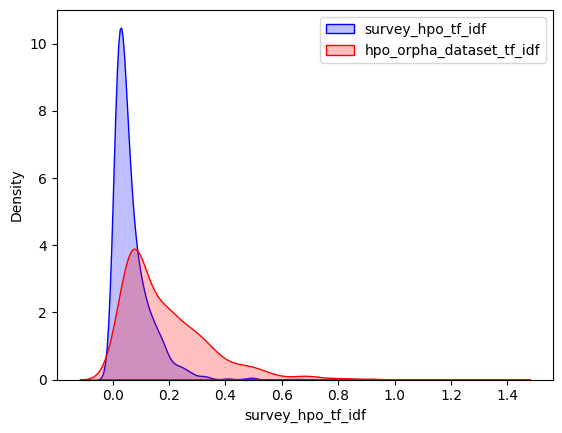

In [77]:
sns.kdeplot(rx_orphanet['survey_hpo_tf_idf'], shade=True, color="b")
sns.kdeplot(rx_orphanet['hpo_orpha_dataset_tf_idf'], shade=True, color="r")
plt.legend(('survey_hpo_tf_idf', 'hpo_orpha_dataset_tf_idf'))
plt.show()

# Step 6: Analyze and make Conclusions

We call a term 'new' if it is not found in hpo/orphanet dataset.
We call a term 'top terms' which has higher survey_hpo_tf_idf_value than average.

### Look at diseases with an Orphanet entry

In [79]:
#we analyze here Kleefstra syndrome for Orphanet entry
dis_orpha = rx_orphanet_summary.loc[rx_orphanet_summary.index==rx_in_orphanet[0]]

The following terms are new and top terms for the Kleefstra syndrome. We see 'Abnormality of coordination', 'Somnambulism', 'Sleep onset insomnia', 'Drowsiness', .. from the follwing lists are new or different from hpo or orphanet dataset. 

In [109]:
dis_orpha[dis_orpha['NewRareX']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
Kleefstra syndrome,Coordination_Issues_Symptom_Present,15.0,0.625000,0.022129,HP:0011443,Abnormality of coordination,0.223117,Frequent (79-30%),NaN,NaN,...,NaN,1.639086e-13,1,1,0,1,0,0,0,[]
Kleefstra syndrome,CSHQ Subscale 5: Night Wakings,11.0,0.458333,0.016228,HP:0025236,Somnambulism,0.175368,Frequent (79-30%),NaN,NaN,...,NaN,1.476035e-09,1,1,0,1,0,0,0,[]
Kleefstra syndrome,CSHQ Subscale 2: Sleep onset Delay,12.0,0.500000,0.017703,HP:0031354,Sleep onset insomnia,0.174368,Frequent (79-30%),NaN,NaN,...,NaN,1.698093e-10,1,1,0,1,0,0,0,[]
Kleefstra syndrome,CSHQ Subscale 8: Daytime Sleepiness,12.0,0.500000,0.017703,HP:0002329,Drowsiness,0.139476,Frequent (79-30%),NaN,NaN,...,NaN,1.698093e-10,1,1,0,1,0,0,0,[]
Kleefstra syndrome,Cognitive_Impairment_Symptom_Present,16.0,0.666667,0.024653,HP:0100543,Cognitive impairment,0.133865,Frequent (79-30%),NaN,NaN,...,[0.0],1.353374e-14,1,1,0,0,0,0,0,"[[Atypical behavior, 6]]"
Kleefstra syndrome,Esophagus_Issues_Symptom_Present,10.0,0.416667,0.015408,HP:0012719,Functional abnormality of the gastrointestinal...,0.132473,Frequent (79-30%),NaN,NaN,...,[37.5],1.201914e-08,1,1,1,0,0,0,0,"[[Gastroesophageal reflux, 5]]"
Kleefstra syndrome,Abnormal_Muscle_Function_Symptom_Present,11.0,0.458333,0.016228,HP:0003011,Abnormality of the musculature,0.130043,Frequent (79-30%),NaN,NaN,...,NaN,1.476035e-09,1,1,0,1,0,0,0,[]
Kleefstra syndrome,CSHQ Subscale 7: Sleep Disordered Breathing,11.0,0.458333,0.016228,HP:0010535,Sleep apnea,0.119823,Frequent (79-30%),NaN,NaN,...,NaN,1.476035e-09,1,1,0,1,0,0,0,[]
Kleefstra syndrome,Abnormal_Eye_Movement_Symptom_Present,11.0,0.458333,0.017703,HP:0000496,Abnormality of eye movement,0.115640,Frequent (79-30%),NaN,NaN,...,NaN,1.476035e-09,1,1,0,1,0,0,0,[]


The following new terms which are top terms for the Kleefstra syndrome show that abnormality of coordination, Somnambulism, Sleep onset insomnia, Drowsiness, Seizure, Abnormality of the musculature, Sleep apnea, .. are common. These terms are important terms for the Kleefstra syndrome but not exist/matched in the hpo/orpha dataset. 

In [110]:
dis_orpha[dis_orpha['top_terms_not_match_but_frequent']==1]

Kleefstra syndrom show agreement for Constipation, Abnormal repetitive mannerisms, hypotonia, Sleep disturbance, Seizure, Autistic behavior whcih are are common in hpo and survey dataset.

In [114]:
dis_orpha[dis_orpha['matched_terms_frequent_both']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
Kleefstra syndrome,Constipation_Symptom_Present,17.0,0.708333,0.026194,HP:0002019,Constipation,0.146193,Frequent (79-30%),Frequent (79-30%),54.5,...,0.0,0.172372,1,0,0,0,1,0,0,[]
Kleefstra syndrome,Hypotonia_Symptom_Present,17.0,0.708333,0.026194,HP:0001252,Hypotonia,0.105486,Frequent (79-30%),Very frequent (99-80%),89.5,...,35.0,0.023233,1,0,1,0,1,0,0,[]
Kleefstra syndrome,CSHQ Subscale 1: Bedtime Resistance,12.0,0.500000,0.017703,HP:0002360,Sleep disturbance,0.103100,Frequent (79-30%),Frequent (79-30%),54.5,...,0.0,0.820132,1,0,0,0,1,0,0,[]
Kleefstra syndrome,CSHQ Subscale 3: Sleep Duration,12.0,0.500000,0.017703,HP:0002360,Sleep disturbance,0.103100,Frequent (79-30%),Frequent (79-30%),54.5,...,0.0,0.820132,1,0,0,0,1,0,0,[]
Kleefstra syndrome,CSHQ Subscale 4: Sleep Anxiety,11.0,0.458333,0.016228,HP:0002360,Sleep disturbance,0.094509,Frequent (79-30%),Frequent (79-30%),54.5,...,0.0,0.498799,1,0,0,0,1,0,0,[]
Kleefstra syndrome,ASD_Symptom_Present,11.0,0.458333,0.017703,HP:0000729,Autistic behavior,0.088044,Frequent (79-30%),Frequent (79-30%),54.5,...,0.0,0.498799,1,0,0,0,1,0,0,[]


The following top terms for the Kleefstra syndrome has the higher frequency in suvey than their matched/similar terms in the hpo/orphanet dataset show that Abnormal repetitive mannerisms has higher frequency in survey data. 

In [117]:
dis_orpha.loc[dis_orpha['top_matched_terms_frequent_survey_only']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
Kleefstra syndrome,Repetitive_Stereotypic_Behavior_Symptom_Present,12.0,0.5,0.01849,HP:0000733,Abnormal repetitive mannerisms,0.110958,Frequent (79-30%),Occasional (29-5%),17.0,...,37.5,0.002081,1,0,1,0,0,1,0,[]


The following top terms for the Kleefstra syndrome but has the higher term proportion difference with their matched/similar terms than average show that Functional abnormality of the gastrointestinal, Abnormal repetitive mannerisms, Hypotonia, Bruxism have higher proportional difference. 

In [118]:
dis_orpha.loc[dis_orpha['top_hpo_term_prop_diff']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
Kleefstra syndrome,Esophagus_Issues_Symptom_Present,10.0,0.416667,0.015408,HP:0012719,Functional abnormality of the gastrointestinal...,0.132473,Frequent (79-30%),NaN,NaN,...,[37.5],1.201914e-08,1,1,1,0,0,0,0,"[[Gastroesophageal reflux, 5]]"
Kleefstra syndrome,Repetitive_Stereotypic_Behavior_Symptom_Present,12.0,0.500000,0.018490,HP:0000733,Abnormal repetitive mannerisms,0.110958,Frequent (79-30%),Occasional (29-5%),17.0,...,37.5,2.080838e-03,1,0,1,0,0,1,0,[]
Kleefstra syndrome,Hypotonia_Symptom_Present,17.0,0.708333,0.026194,HP:0001252,Hypotonia,0.105486,Frequent (79-30%),Very frequent (99-80%),89.5,...,35.0,2.323260e-02,1,0,1,0,1,0,0,[]
Kleefstra syndrome,Bruxism_Symptom_Present,8.0,0.333333,0.016800,HP:0003763,Bruxism,0.096243,Frequent (79-30%),NaN,NaN,...,[37.5],6.680639e-07,1,1,1,0,0,0,0,"[[Abnormal repetitive mannerisms, 2]]"
Kleefstra syndrome,Temper_Tantrums_Symptom_Present,7.0,0.291667,0.011767,HP:0025160,Abnormal temper tantrums,0.084966,Occasional (29-5%),NaN,NaN,...,"[37.5, 37.5, 37.5]",4.597852e-06,1,1,1,0,0,0,0,"[[Atypical behavior, 6], [Autistic behavior, 6..."
Kleefstra syndrome,Flexible_Joints_Symptom_Present,8.0,0.333333,0.015348,HP:0001382,Joint hypermobility,0.077383,Frequent (79-30%),NaN,NaN,...,[37.5],6.680639e-07,1,1,1,0,0,0,0,"[[Limitation of joint mobility, 1]]"
Kleefstra syndrome,Difficulty_Nonverbal_Behaviors_Symptom_Present,8.0,0.333333,0.013448,HP:0001344,Absent speech,0.066210,Frequent (79-30%),NaN,NaN,...,[35.0],6.680639e-07,1,1,1,0,0,0,0,"[[Delayed speech and language development, 1]]"
Kleefstra syndrome,PELHS Sleep disorder,7.0,0.291667,0.012847,HP:0002360,Sleep disturbance,0.062662,Occasional (29-5%),Frequent (79-30%),54.5,...,37.5,3.929343e-02,1,0,1,0,0,0,0,[]
Kleefstra syndrome,PELHS Autism/PDD,6.0,0.250000,0.010537,HP:0000717,Autism,0.059260,Occasional (29-5%),NaN,NaN,...,[37.5],3.014147e-05,1,1,1,0,0,0,0,"[[Autistic behavior, 6]]"


These terms for the Kleefstra syndrome such as 'Exaggerated cupid's bow', 'Tented upper lip vermilion', 'Everted lower lip vermilion, 'Malar flattening', .. are common in hpo with high tf_idf score but not found in survey data.

In [122]:
dis_orpha.loc[dis_orpha['Found_only_in_HPO']==1].sort_values(by ='hpo_orpha_dataset_tf_idf', ascending=False)

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0002263,Exaggerated cupid's bow,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0010804,Tented upper lip vermilion,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0000232,Everted lower lip vermilion,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0000272,Malar flattening,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0000280,Coarse facial features,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0001710,Conotruncal defect,NaN,NaN,Frequent (79-30%),50.0,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0003196,Short nose,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0010864,"Intellectual disability, severe",NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]
Kleefstra syndrome,NaN,NaN,NaN,NaN,HP:0000463,Anteverted nares,NaN,NaN,Very frequent (99-80%),89.5,...,0,1.0,0,0,0,0,0,0,1,[]


The following terms for the Kleefstra syndrome are the similar terms with other symptoms which are not found in the orphanet or hpo dataset. The number defines the number of the times the term is found similar with other terms.

In [121]:
common_matched_terms = count_matched_term(rx_orphanet_summary)[rx_in_orphanet[0]]
common_matched_terms = [[Ontology.get_hpo_object(term).name, count] for term, count in common_matched_terms]
common_matched_terms

[['Atypical behavior', 6],
 ['Autistic behavior', 6],
 ['Sleep disturbance', 6],
 ['Gastroesophageal reflux', 5],
 ['Advanced eruption of teeth', 3],
 ['Delayed eruption of teeth', 3],
 ['Seizure', 3],
 ['Constipation', 2],
 ['Abnormal repetitive mannerisms', 2],
 ['Hearing impairment', 2],
 ['Self-injurious behavior', 1],
 ['Aggressive behavior', 1],
 ['Limitation of joint mobility', 1],
 ['Delayed speech and language development', 1],
 ['Scoliosis', 1],
 ['Developmental regression', 1],
 ['Intellectual disability, severe', 1],
 ['Short nose', 1],
 ['Arrhythmia', 1],
 ['Short stature', 1],
 ['Brachycephaly', 1],
 ['Renal insufficiency', 1]]

### Diseases with HPO entry
diseases which have not been found in orphanet

In [87]:
#we analyze here CHAMP1 related disorders for HPO entry
dis_hpo = rx_hpo_only_summary.loc[rx_hpo_only_summary.index==rx_in_hpo[1]]

The following terms are new and top terms for the CHAMP1 related disorders. We see 'Somnambulism', 'Sleep onset insomnia', 'Drowsiness', 'Sleep apnea', 'Sleep disturbance' .. from the follwing lists are new or different from hpo or orphanet dataset. 

In [124]:
dis_hpo[dis_hpo['NewRareX']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
CHAMP1 related disorders,CSHQ Subscale 5: Night Wakings,12.0,0.923077,0.035571,HP:0025236,Somnambulism,0.384397,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 2: Sleep onset Delay,12.0,0.923077,0.035571,HP:0031354,Sleep onset insomnia,0.350355,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 8: Daytime Sleepiness,12.0,0.923077,0.035571,HP:0002329,Drowsiness,0.280247,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 7: Sleep Disordered Breathing,12.0,0.923077,0.035571,HP:0010535,Sleep apnea,0.262646,Very frequent (99-80%),NaN,NaN,...,[39.5],2.630681e-15,1,1,1,0,0,0,0,"[[Obstructive sleep apnea, 1]]"
CHAMP1 related disorders,CSHQ Subscale 1: Bedtime Resistance,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 4: Sleep Anxiety,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 3: Sleep Duration,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,Aggressive_Violent_Behavior_Symptom_Present,5.0,0.384615,0.019274,HP:0006919,"Abnormal aggressive, impulsive or violent beha...",0.150435,Frequent (79-30%),NaN,NaN,...,NaN,9.168983e-06,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,Esophagus_Issues_Symptom_Present,5.0,0.384615,0.015480,HP:0012719,Functional abnormality of the gastrointestinal...,0.133088,Frequent (79-30%),NaN,NaN,...,[14.5],9.168983e-06,1,1,0,0,0,0,0,"[[Gastroesophageal reflux, 4]]"


The following new terms which are top terms for the CHAMP1 related disorders show that Somnambulism, Somnambulism, Sleep onset insomnia, Drowsiness, Sleep disturbance are common. These terms are important terms for the Kleefstra syndrome but not exist/similar to the term in the hpo/orpha dataset. 

In [126]:
dis_hpo[dis_hpo['top_terms_not_match_but_frequent']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
CHAMP1 related disorders,CSHQ Subscale 5: Night Wakings,12.0,0.923077,0.035571,HP:0025236,Somnambulism,0.384397,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 2: Sleep onset Delay,12.0,0.923077,0.035571,HP:0031354,Sleep onset insomnia,0.350355,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 8: Daytime Sleepiness,12.0,0.923077,0.035571,HP:0002329,Drowsiness,0.280247,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 1: Bedtime Resistance,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 4: Sleep Anxiety,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,CSHQ Subscale 3: Sleep Duration,12.0,0.923077,0.035571,HP:0002360,Sleep disturbance,0.207158,Very frequent (99-80%),NaN,NaN,...,NaN,2.630681e-15,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,Aggressive_Violent_Behavior_Symptom_Present,5.0,0.384615,0.019274,HP:0006919,"Abnormal aggressive, impulsive or violent beha...",0.150435,Frequent (79-30%),NaN,NaN,...,NaN,9.168983e-06,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,Abnormal_Muscle_Function_Symptom_Present,5.0,0.384615,0.014821,HP:0003011,Abnormality of the musculature,0.118770,Frequent (79-30%),NaN,NaN,...,NaN,9.168983e-06,1,1,0,1,0,0,0,[]
CHAMP1 related disorders,PELHS Autism/PDD,5.0,0.384615,0.017643,HP:0000717,Autism,0.099226,Frequent (79-30%),NaN,NaN,...,NaN,9.168983e-06,1,1,0,1,0,0,0,[]


CHAMP1 related disorders show agreement for Hypotonia, Abnormal repetitive mannerisms, Feeding difficulties, SIntellectual disability whcih are common in hpo and survey dataset.

In [128]:
dis_hpo[dis_hpo['matched_terms_frequent_both']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
CHAMP1 related disorders,Hypotonia_Symptom_Present,7.0,0.538462,0.021672,HP:0001252,Hypotonia,0.087274,Frequent (79-30%),Very frequent (99-80%),100.0,...,45.5,6.791839e-07,1,0,1,0,1,0,0,[]
CHAMP1 related disorders,Repetitive_Stereotypic_Behavior_Symptom_Present,4.0,0.307692,0.012384,HP:0000733,Abnormal repetitive mannerisms,0.074316,Frequent (79-30%),Frequent (79-30%),60.0,...,5.5,7.191858e-02,1,0,0,0,1,0,0,[]
CHAMP1 related disorders,Feeding_Difficulties_Symptom_Present,4.0,0.307692,0.011857,HP:0011968,Feeding difficulties,0.058024,Frequent (79-30%),Very frequent (99-80%),80.0,...,25.5,5.562858e-04,0,0,0,0,1,0,0,[]
CHAMP1 related disorders,PELHS Intellectual disability,4.0,0.307692,0.012384,HP:0001249,Intellectual disability,0.046513,Frequent (79-30%),Very frequent (99-80%),100.0,...,45.5,1.197644e-10,0,0,0,0,1,0,0,[]


The following top terms for the CHAMP1 related disorders but has the higher term proportion difference with their matched/similar terms than average show that Sleep apnea, Constipation, Cognitive impairment, Abnormality of coordination, .. have different proportion. 

In [130]:
dis_hpo.loc[dis_hpo['top_hpo_term_prop_diff']==1]

,Symptom,Count,term_proportion,survey_tf_idf,HPO_Code,HPO_label,survey_hpo_tf_idf,Survey_OrphaClass,HPO_Frequency_OrphaClass,HPO_Count,...,abs_hpo_term_prop_difference,fisher_value,top_terms,NewRareX,top_hpo_term_prop_diff,top_terms_not_match_but_frequent,matched_terms_frequent_both,top_matched_terms_frequent_survey_only,Found_only_in_HPO,matched_terms_count
Disease_Name,,,,,,,,,,,,,,,,,,,,,
CHAMP1 related disorders,CSHQ Subscale 7: Sleep Disordered Breathing,12.0,0.923077,0.035571,HP:0010535,Sleep apnea,0.262646,Very frequent (99-80%),NaN,NaN,...,[39.5],2.630681e-15,1,1,1,0,0,0,0,"[[Obstructive sleep apnea, 1]]"
CHAMP1 related disorders,Constipation_Symptom_Present,7.0,0.538462,0.021672,HP:0002019,Constipation,0.120953,Frequent (79-30%),NaN,NaN,...,[25.5],4.443259e-08,1,1,1,0,0,0,0,"[[Feeding difficulties, 2]]"
CHAMP1 related disorders,Cognitive_Impairment_Symptom_Present,6.0,0.461538,0.018576,HP:0100543,Cognitive impairment,0.100865,Frequent (79-30%),NaN,NaN,...,[45.5],6.791839e-07,1,1,1,0,0,0,0,"[[Intellectual disability, 2]]"
CHAMP1 related disorders,Coordination_Issues_Symptom_Present,3.0,0.230769,0.008893,HP:0011443,Abnormality of coordination,0.089661,Occasional (29-5%),NaN,NaN,...,[33.0],1.221512e-03,1,1,1,0,0,0,0,"[[Incoordination, 1]]"
CHAMP1 related disorders,Hypotonia_Symptom_Present,7.0,0.538462,0.021672,HP:0001252,Hypotonia,0.087274,Frequent (79-30%),Very frequent (99-80%),100.0,...,45.5,6.791839e-07,1,0,1,0,1,0,0,[]
CHAMP1 related disorders,Defecation_Issues_Symptom_Present,3.0,0.230769,0.010586,HP:0012719,Functional abnormality of the gastrointestinal...,0.081151,Occasional (29-5%),NaN,NaN,...,[23.0],1.221512e-03,1,1,1,0,0,0,0,"[[Gastroesophageal reflux, 4]]"
CHAMP1 related disorders,PELHS Learning disability,4.0,0.307692,0.012384,HP:0001328,Specific learning disability,0.072595,Frequent (79-30%),NaN,NaN,...,[45.5],1.110466e-04,1,1,1,0,0,0,0,"[[Intellectual disability, 2]]"
CHAMP1 related disorders,Abnormal_Facial_Muscles_Symptom_Present,2.0,0.153846,0.006467,HP:0000301,Abnormality of facial musculature,0.062094,Occasional (29-5%),NaN,NaN,...,[63.0],1.232617e-02,1,1,1,0,0,0,0,"[[Facial hypotonia, 1]]"


These terms such as 'Overfriendliness', 'Tented upper lip vermilion', 'Everted lower lip vermilion', 'Malar flattening', 'Facial hypotonia', .. are common in hpo with high tf_idf score but not found in survey data.

In [131]:
dis_hpo.loc[dis_hpo['Found_only_in_HPO']==1].sort_values(by ='hpo_orpha_dataset_tf_idf', ascending=False)

The following terms for CHAMP1 related disorders are the similar terms with other symptoms which are not found in the orphanet or hpo dataset. The number defines the number of the times the term is found similar with other terms.

In [93]:
common_matched_terms = count_matched_term(rx_hpo_only_summary)[rx_in_hpo[0]]
common_matched_terms = [[Ontology.get_hpo_object(term).name, count] for term, count in common_matched_terms]
common_matched_terms

[['Autistic behavior', 9],
 ['Intellectual disability', 1],
 ['Bilateral tonic-clonic seizure', 1],
 ['Status epilepticus', 1],
 ['Developmental regression', 1]]

### Multiple diseases
We analyze here following disease CACNA1A related disorders which is mapped with 'Familial paroxysmal ataxia' in hpo dataset. There are multple disease have been mapped with CACNA1A related disorders, we analyze here Familial paroxysmal ataxia mapped disease.  

In [94]:
rx_dis_name = rx_in_mult[0]
mapped_mult_dis_name = rarex_multiple_dis_mapping[rx_dis_name][0]
dis_mult = rx_multi_disease_summary.loc[rx_multi_disease_summary.index==(rx_dis_name, mapped_mult_dis_name)]


The following terms are new and top terms for the Familial paroxysmal ataxia. We see 'Somnambulism', 'Abnormality of coordination', 'Sleep onset insomnia', 'Sleep apnea', 'Abnormality of eye movement' .. from the follwing lists are new or different from hpo or orphanet dataset.

In [132]:
dis_mult[dis_mult['NewRareX']==1]

The following new terms which are top terms for the Familial paroxysmal ataxia show that Somnambulism, Somnambulism, Sleep onset insomnia, Drowsiness, Sleep apnea, Abnormality of the musculature  are common. These terms are important terms for the Familial paroxysmal ataxia but not exist/similar to the term in the hpo/orpha dataset. 

In [133]:
dis_mult[dis_mult['top_terms_not_match_but_frequent']==1]

Familial paroxysmal ataxia show agreement for Migraine whcih are common in hpo and survey dataset.

In [134]:
dis_mult[dis_mult['matched_terms_frequent_both']==1]

The following top terms for the Familial paroxysmal ataxia but has the higher term proportion difference with their matched/similar terms than average show that Abnormality of coordination, Abnormality of eye movement, Sleep disturbance, Cognitive impairment	, .. have different proportion. 

In [135]:
dis_mult.loc[dis_mult['top_hpo_term_prop_diff']==1]

These terms such as 'Hemiplegia', 'Ataxia', 'Nystagmus', 'Diplopia', 'Nausea and vomiting', .. are common in hpo with high tf_idf score for Familial paroxysmal ataxia but not found in survey data.

In [136]:
dis_mult.loc[dis_mult['Found_only_in_HPO']==1].sort_values(by ='hpo_orpha_dataset_tf_idf', ascending=False)

The following terms are the similar terms with other symptoms which are not found in the orphanet or hpo dataset for Familial paroxysmal ataxia. The number defines the number of the times the term is found similar with other terms.

In [100]:
common_matched_terms = count_matched_term(rx_multi_disease_summary)[rx_dis_name]
common_matched_terms = [[Ontology.get_hpo_object(term).name, count] for term, count in common_matched_terms]
common_matched_terms

[['Atypical behavior', 9],
 ['Dystonia', 5],
 ['Nausea and vomiting', 3],
 ['Migraine', 2],
 ['Ataxia', 1],
 ['Nystagmus', 1],
 ['Intellectual disability', 1]]